## Book Recommendation System 


The recommendation system with Collaborative Filtering by KNN model and Matrix Factorization.

The Recommendation System is based on previous (past behaviours, it predicts the likelihood that a user would prefer an item. The purpose of recommender systems is recommending new things that are not seen before from people. Many of applications for example Netflix uses recommendation system. It suggests people new movies according to their past activities that are like watching and voting movies. 

The objective of a book recommendation system is to predict buyer’s interest and recommend books to them respectively. That system can take into regard many parameters like book content and quality by filtering user reviews. 

In this approach I analyze data about books and I have used a method of recommendation - colaborative filtering and matrix factorization. The final result will show that the user can input one book's name or author then the system can provide the other most possible books that he can to read.

**Dataset:**

The dataset comes from Goodreads book dataset and can be find on Kaggle.

Columns Description:

- bookID: the unique ID for each book/series;
- title: titles of the books;
- authors: the author of the particular book;
- average_rating: the average rating of the books, as decided by the users;
- ISBN: number, tells the information about a book - such as edition and publisher;
- ISBN 13: the new format for ISBN, implemented in 2007, 13 digits;
- language_code: the language for the books;
- Num_pages: the number of pages for the book;
- Ratings_count: the number of ratings given for the book;
- text_reviews_count: the count of text reviews left by users.



### Import libraries and data

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import sklearn
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import TruncatedSVD

import warnings
warnings.filterwarnings("ignore",category =RuntimeWarning)

In [2]:
df = pd.read_csv(r'C:\\Python Scripts\\Datasets\\goodreads book\\books.csv', error_bad_lines=False)
df.head()

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


First observations:

In [3]:
df.shape

(11123, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [5]:
df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [6]:
df.dtypes

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
  num_pages             int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

In [7]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [8]:
#checking the unique values
df.language_code.unique()

array(['eng', 'en-US', 'fre', 'spa', 'en-GB', 'mul', 'grc', 'enm',
       'en-CA', 'ger', 'jpn', 'ara', 'nl', 'zho', 'lat', 'por', 'srp',
       'ita', 'rus', 'msa', 'glg', 'wel', 'swe', 'nor', 'tur', 'gla',
       'ale'], dtype=object)

In [9]:
#checking the unique values
df.publisher.value_counts()

Vintage                         318
Penguin Books                   261
Penguin Classics                184
Mariner Books                   150
Ballantine Books                144
                               ... 
Time Warner Books UK              1
The Bodley Head Ltd               1
Alfabeta Bokförlag                1
Larousse Kingfisher Chambers      1
Simon & Schuster Paperbacks       1
Name: publisher, Length: 2290, dtype: int64

After first observations we can see that there are no missing values. There are total 11123 rows with 12 columns. There are 6 numerical columns with int64 and float64 values and 6 categorical (object) values. The column publication_date has the dtype as object and I will change it to datetime. One can also see that num_pages is indented. 

### Data preparation

Firstly I prepare the data to further analysis. I change publication_date column type from object to detatime and I extract publication year to separate column. There are many languages in data so for simplicity I replace language code with language name. Finally I cut indented from num_pages column.

In [3]:
df['publication_date'] = pd.to_datetime(df['publication_date'], errors='coerce')

In [4]:
# extracting publication year
df['Year'] = pd.to_datetime(df['publication_date']).dt.to_period('Y')

In [5]:
df.language_code.replace(to_replace=['eng', 'en-US', 'en-GB', 'enm','en-CA'],
                         value=['English', 'English', 'English', 'English', 'English'],inplace=True)

In [6]:
df.language_code.replace(to_replace=['fre', 'spa', 'mul', 'grc','ger', 'jpn', 'ara', 'nl', 'zho',
                                     'lat', 'por','srp', 'ita', 'rus', 'msa', 'glg', 'wel', 'swe', 
                                     'nor', 'tur','gla', 'ale'],
                         value=['French','Spanish','Multiple language','Greek','German','Japanese',
                                'Arabic','Dutch','Chinese','Latvian','Portuguese','Serbian','Initial teaching language',
                                'Russian','Modern Standard Arabic','Galician','Welsh','Swedish','Murik','Turkish','Gaelic',
                                'Afro-Asiatic'],inplace=True)

In [7]:
df.rename(columns={'  num_pages': 'num_pages', 'language_code':'language'},inplace=True)

In [8]:
df.head(2)

,bookID,title,authors,average_rating,isbn,isbn13,language,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Year
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,English,652,2095690,27591,2006-09-16,Scholastic Inc.,2006
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,English,870,2153167,29221,2004-09-01,Scholastic Inc.,2004


### Exploratory Data Analysis

In [9]:
df2 = df.copy()

Some information about the data:

In [17]:
df2.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [18]:
avg_rating = round(df2['average_rating'].mean(),1)
avg_num = round(df2['num_pages'].mean(),)

print(f"The average ratings of the book are {avg_rating}.\nThe average number of pages are {avg_num}. ")

The average ratings of the book are 3.9.
The average number of pages are 336. 


From above short analysis one can see that the highest average rating a book can get is 5.0 and the lowest average rating a book can get is 0. The average number of book pages are 336.

**The top 10 authors with most number of books published:**

In [19]:
authors = df2['authors'].value_counts().head(10)
authors

P.G. Wodehouse         40
Stephen King           40
Rumiko Takahashi       39
Orson Scott Card       35
Agatha Christie        33
Piers Anthony          30
Sandra Brown           29
Mercedes Lackey        29
Dick Francis           28
Laurell K. Hamilton    23
Name: authors, dtype: int64

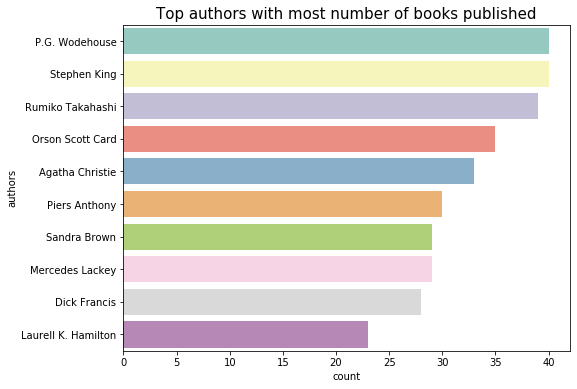

In [20]:
plt.figure(figsize=(8,6))
sns.countplot(y = "authors", data = df2, order = authors.index, palette = "Set3")
plt.title('Top authors with most number of books published', fontsize = 15)
plt.show()

From the chart above one can see that P.G. Wodehouse and Stephen King have the most books in the data. Both authors have 40 books in dataset and the next authors are Rumiko Takahashi, Orson Scott Card and Agatha Christie.

**The most reviewed books**

The books with the largest number of rating:

In [21]:
books = df2.sort_values('ratings_count', ascending = False).head(10).set_index('title')

C:\Users\PC\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


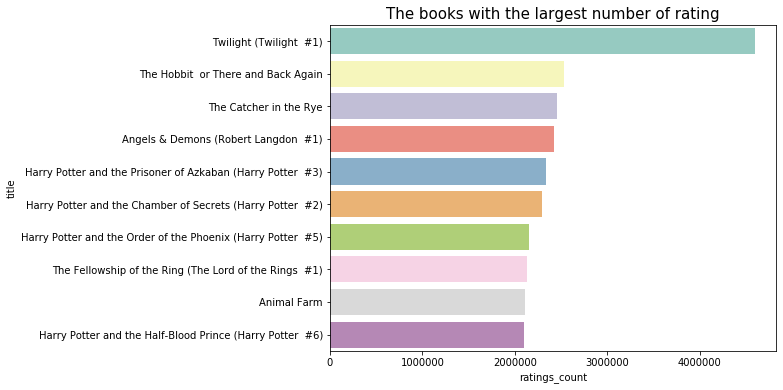

In [22]:
plt.figure(figsize=(8,6))
sns.barplot(books['ratings_count'], books.index, palette='Set3')
plt.title('The books with the largest number of rating', fontsize = 15)
plt.show()

The ratings_count column contains the number of ratings given for the book. Based on this column I receive the most commented books in our data. 

All of these ratings are counts in the millions. The "Twilight" has been rated more times than any other book and it reviewed over 4 million times. A half as much has been reviewed "The Hobbit or There and Back Again" and "The Catcher in the Rye" which were over 2 million times.

**Top books by average rating**

The books with the best rating. For our analysis I choose book with high ratings count, above 1000000.

In [23]:
rating = df2[df2['ratings_count']>1000000]

In [24]:
books_rated = rating[['average_rating','title']].groupby('title').mean().sort_values('average_rating', axis=0, ascending = False).head(10)
books_rated

,average_rating
title,
Harry Potter and the Half-Blood Prince (Harry Potter #6),4.57
Harry Potter and the Prisoner of Azkaban (Harry Potter #3),4.56
Harry Potter and the Order of the Phoenix (Harry Potter #5),4.49
Harry Potter and the Chamber of Secrets (Harry Potter #2),4.42
The Book Thief,4.37
The Fellowship of the Ring (The Lord of the Rings #1),4.36
The Hobbit or There and Back Again,4.27
The Lightning Thief (Percy Jackson and the Olympians #1),4.25
Charlotte's Web,4.17


C:\Users\PC\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


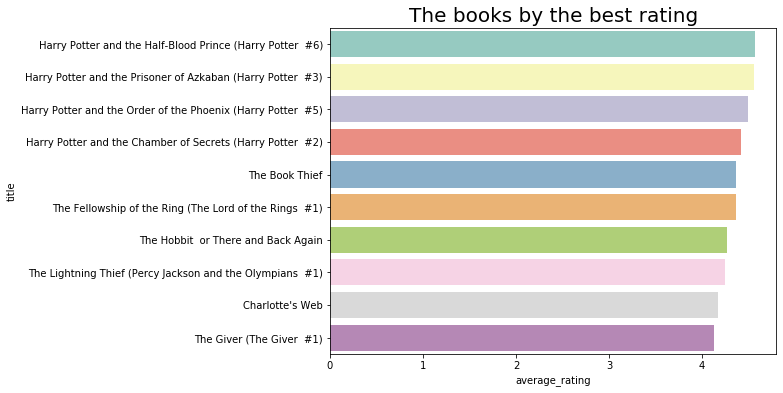

In [25]:
plt.figure(figsize=(8,6))
sns.barplot(books_rated['average_rating'], books_rated.index, palette='Set3')
plt.title('The books by the best rating', fontsize = 20)
plt.show()

From chart above one can see that the book with high average rating is "Harry Potter and the Half-Blood Prince (Harry Potter #6)" and "Harry Potter and the Prisoner of Azkaban (Harry Potter #3)". They have rating almost 5.0. 

**Top authors by average rating**

In [26]:
auth_rated = df2.groupby('authors')['average_rating'].mean().sort_values(ascending=False).head(20)
auth_rated

authors
Dennis Adler/R.L. Wilson                                5.00
Chris    Green/Chris Wright/Paul Douglas Gardner        5.00
Nicholas    Evans/Rhonda  Evans                         5.00
Middlesex Borough Heritage Committee                    5.00
Sheri Rose Shepherd                                     5.00
Sara Barton-Wood                                        5.00
Aristophanes/F.W. Hall/W.M. Geldart                     5.00
Todd Davis/Marc Frey                                    5.00
Ian        Martin/Katie Elliott                         5.00
Julie Sylvester/David Sylvester                         5.00
Keith Donohue                                           5.00
John  Diamond                                           5.00
Laura Driscoll/Alisa Klayman-Grodsky/Eric     Weiner    5.00
James E. Campbell                                       5.00
William C. Dowling                                      5.00
Ross Garnaut                                            5.00
R. McL. Wilson  

The authors with the best rating are Dennis Adler/R.L. Wilson and Chris Green/Chris Wright/Paul Douglas Gardner. They have score by 5.0.

**The publishing house with most number of books published**

In [27]:
publisher = df2['publisher'].value_counts().head(10)

In [28]:
publisher

Vintage             318
Penguin Books       261
Penguin Classics    184
Mariner Books       150
Ballantine Books    144
Harper Perennial    112
HarperCollins       112
Pocket Books        111
Bantam              110
VIZ Media LLC        88
Name: publisher, dtype: int64

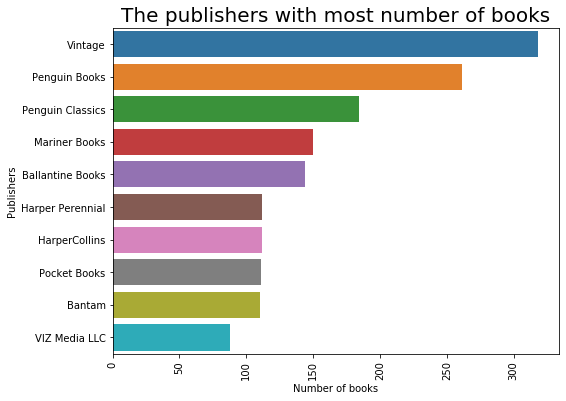

In [29]:
plt.figure(figsize=(8,6))
sns.barplot(x=publisher,y=publisher.index)
plt.xticks(rotation=90)
plt.ylabel('Publishers')
plt.xlabel('Number of books')
plt.title('The publishers with most number of books', fontsize = 20)
plt.show()

The publishing house with the most number of books published is "Vintage " with 318 books and "Penguin Books" with 261 as well.

**The books with the most text reviews**

In [30]:
reviews = df2.sort_values('text_reviews_count', ascending = False).head(10).set_index('title')

C:\Users\PC\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


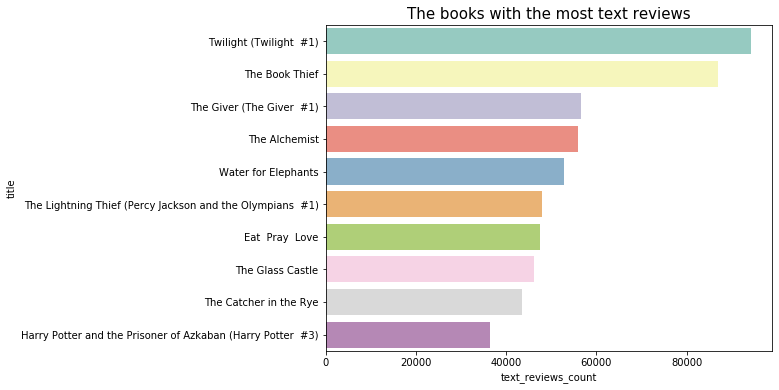

In [31]:
plt.figure(figsize=(8,6))
sns.barplot(reviews['text_reviews_count'], reviews.index, palette='Set3')
plt.title('The books with the most text reviews', fontsize = 15)
plt.show()

The same as in the case of the most reviewed books the "Twilight" has the most text reviews. Right behind him are "The Book Thief" and "The Giver".

**The books with the largest number of pages**

The books with the largest number of pages grouped by the best rating:

In [32]:
pages = rating[['num_pages','title']].groupby('title').mean().sort_values('num_pages', axis=0, ascending = False).head(10)
pages

,num_pages
title,
Harry Potter and the Order of the Phoenix (Harry Potter #5),870
Angels & Demons (Robert Langdon #1),736
Harry Potter and the Half-Blood Prince (Harry Potter #6),652
The Book Thief,552
Jane Eyre,532
Twilight (Twilight #1),501
The Da Vinci Code (Robert Langdon #2),489
Little Women,449
Harry Potter and the Prisoner of Azkaban (Harry Potter #3),435


C:\Users\PC\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


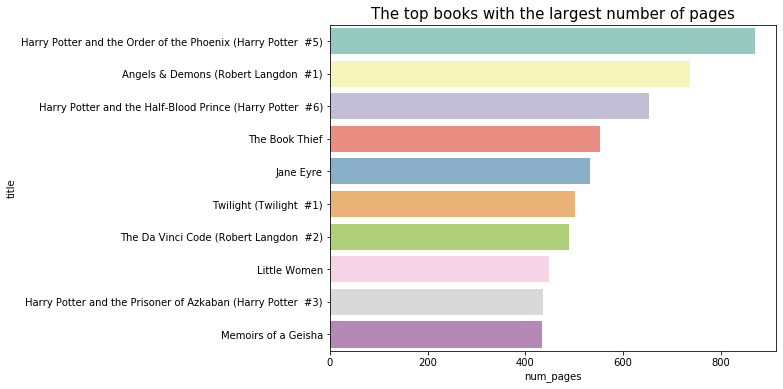

In [34]:
plt.figure(figsize=(8,6))
sns.barplot(pages['num_pages'], pages.index, palette='Set3')
plt.title('The top books with the largest number of pages', fontsize = 15)
plt.show()

According to the high ratings_count the books  with largest number of pages are "Harry Potter and the Order of the Phoenix (Harry Potter #5)" with 870 pages and "Angels & Demons (Robert Langdon #1)" with 736 as well.  

**Year of publishing**

The number of published books by years:

In [35]:
pub_year = df2.Year.value_counts().head(10)
pub_year

2006    1700
2005    1260
2004    1069
2003     931
2002     798
2001     656
2000     533
2007     518
1999     450
1998     396
Freq: A-DEC, Name: Year, dtype: int64

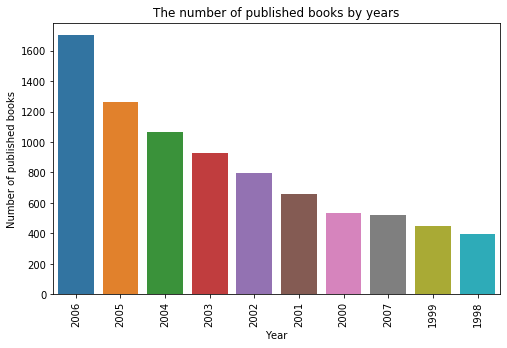

In [36]:
plt.figure(figsize=(8,5))
sns.barplot(x=pub_year.index,y=pub_year)
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Number of published books')
plt.title('The number of published books by years')
plt.show()

The year 2006 marks the highest number of published books.

**The books by the language**

In [37]:
lang = df2['language'].value_counts().head(10)

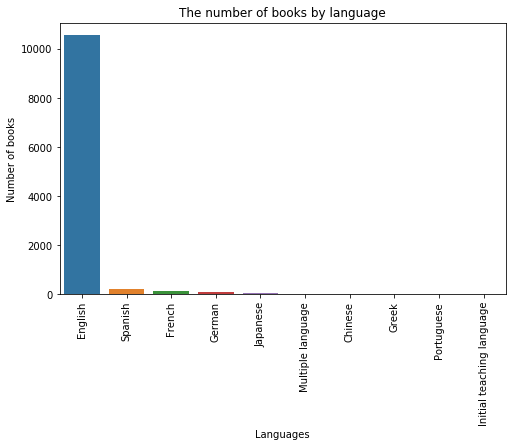

In [38]:
plt.figure(figsize=(8,5))
sns.barplot(x=lang.index,y=lang)
plt.xticks(rotation=90)
plt.xlabel('Languages')
plt.ylabel('Number of books')
plt.title('The number of books by language')
plt.show()

The largest number of books in our data are written in English. 

**Distributions of variables**

Average rating distribution for the books:

C:\Users\PC\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


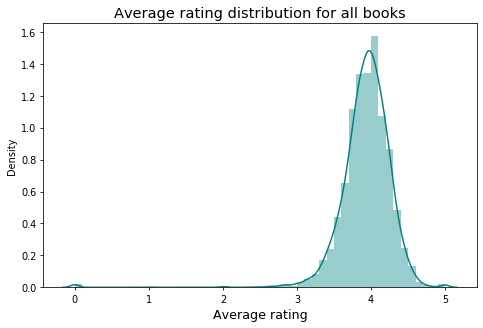

In [39]:
plt.figure(figsize=(8,5), dpi = 70)
sns.distplot(df2.average_rating, color = 'teal')
plt.xlabel('Average rating', fontsize=13)
plt.title('Average rating distribution for all books',fontsize=15)
plt.show();

Ratings count distribution:

C:\Users\PC\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


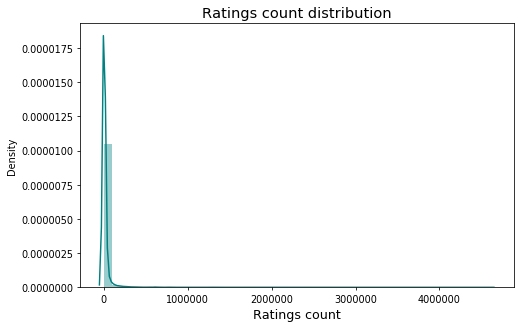

In [40]:
plt.figure(figsize=(8,5), dpi = 70)
sns.distplot(df2.ratings_count, color = 'teal')
plt.xlabel('Ratings count', fontsize=13)
plt.title('Ratings count distribution',fontsize=15)
plt.show();

Text reviews count:

C:\Users\PC\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


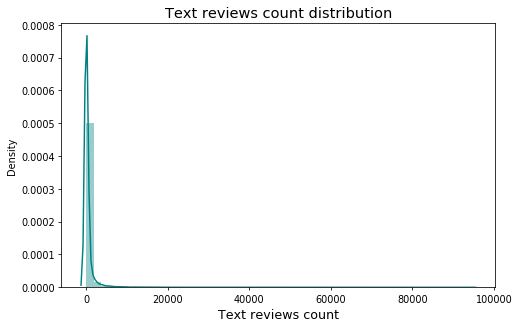

In [41]:
plt.figure(figsize=(8,5), dpi = 70)
sns.distplot(df2.text_reviews_count, color = 'teal')
plt.xlabel('Text reviews count', fontsize=13)
plt.title('Text reviews count distribution',fontsize=15)
plt.show();

From above plots one can see that majority of the ratings lie approximately near 3.7-4.3 and the books having score near 5 are extremely rare. 

**Relationships between variables**

Relationship between Average rating and Rating counts:

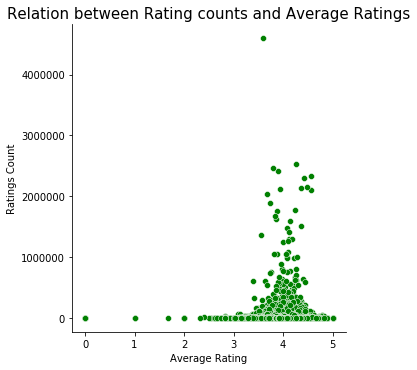

In [42]:
ax = sns.relplot(data=df2, x="average_rating", y="ratings_count", color = 'green', sizes=(100, 200), height=5, marker='o')
plt.title("Relation between Rating counts and Average Ratings",fontsize = 15)
ax.set_axis_labels("Average Rating", "Ratings Count");

From plot above one can see that the most of the ratings for the books lie to near 3.5 -4.5 in case below 1000000 number rating count.

**Relationship between Average rating and Text Reviews count**

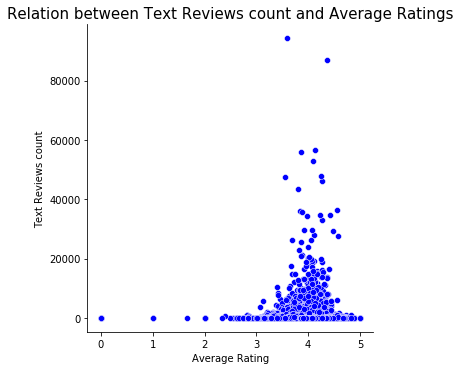

In [43]:
ax = sns.relplot(data=df2, x="average_rating", y="text_reviews_count", color = 'blue', sizes=(100, 200), height=5, marker='o')
plt.title("Relation between Text Reviews count and Average Ratings",fontsize = 15)
ax.set_axis_labels("Average Rating", "Text Reviews count");

It can be observed that most of the ratings for the books seem to lie near 3-4, with a heavy amount of reviews lying near 20000, approximately. The most text reviews are amongst books with better ratings.

**Relationship between average rating and number of pages**

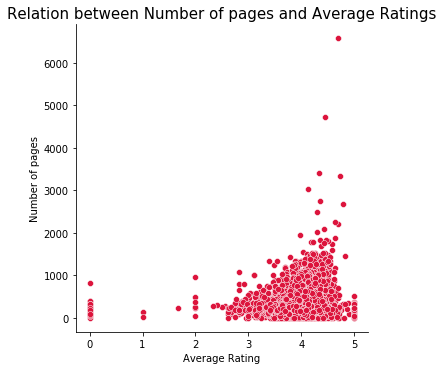

In [44]:
ax = sns.relplot(data=df2, x="average_rating", y="num_pages", color = 'crimson', sizes=(100, 200), height=5, marker='o')
plt.title("Relation between Number of pages and Average Ratings",fontsize = 15)
ax.set_axis_labels("Average Rating", "Number of pages");

It can be observed that most of the ratings for the books lie to near 3-5 in case below 1000 number of pages. There are many presence of outliers for books above 1000 pages. 

## Recommendation system

### Collaborative Filtering

This recommendation based on collaborative filtering with KNN model.

Collaborative filtering method builds a model from a user’s past behaviors (items previously purchased or selected and/or numerical ratings given to those items) as well as similar decisions made by other users. Then this model is used to predict items (or ratings for items) that the user may have an interest in. The method can either be user-based or item-based. 

To apply an item based collaborative filtering I use a KNN algorithm which is a perfect model and also a very good baseline for recommender system development.  

**Data preparation**

Now I create a new column called ‘rating between’. I divide an average rating column into different categories such as rating between 0 and 1, 1 and 2, etc. First I define helper function to create a new column.

In [10]:
def create_rating(row):
    """The function to create a column rating between"""
    if row >= 0 and row <=1:
        return '0-1'
    if row >= 1 and row <=2:
        return '1-2'
    if row >= 2 and row <=3:
        return '2-3'
    if row >= 3 and row <=4:
        return '3-4'
    if row >= 4 and row <=5:
        return '4-5'

In [11]:
df2['rating_between'] = df2['average_rating'].apply(create_rating)

In [12]:
df2.head(3)

,bookID,title,authors,average_rating,isbn,isbn13,language,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Year,rating_between
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,English,652,2095690,27591,2006-09-16,Scholastic Inc.,2006,4-5
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,English,870,2153167,29221,2004-09-01,Scholastic Inc.,2004,4-5
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,English,352,6333,244,2003-11-01,Scholastic,2003,4-5


Then I create two new DataFrames containing different values for the rating_between colum. I will assign a value of 1 if one rating belongs to a particular group for example 4 and 5, and the other will be assigned a value of 0.

The same approach I use to splitting the language code column to retrieve these languages individually and set them to values 1 and 0, where 1 will be assigned if the book is written in English and 0 if it is not.

In [13]:
rating_df = pd.get_dummies(df2['rating_between'])
language_df = pd.get_dummies(df2['language'])

In [14]:
rating_df.head()

,0-1,1-2,2-3,3-4,4-5
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [15]:
language_df.head()

,Afro-Asiatic,Arabic,Chinese,Dutch,English,French,Gaelic,Galician,German,Greek,...,Modern Standard Arabic,Multiple language,Murik,Portuguese,Russian,Serbian,Spanish,Swedish,Turkish,Welsh
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In this step I combine these two data frames into one and call them functions. It will contain the rating_df and language_df values, as well as the average value and the number of ratings. This DataFrame will be added to the recommendation system.

In [16]:
features = pd.concat([rating_df, 
                      language_df, 
                      df2['average_rating'], 
                      df2['ratings_count']], axis=1)
features.head()

,0-1,1-2,2-3,3-4,4-5,Afro-Asiatic,Arabic,Chinese,Dutch,English,...,Murik,Portuguese,Russian,Serbian,Spanish,Swedish,Turkish,Welsh,average_rating,ratings_count
0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,4.57,2095690
1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,4.49,2153167
2,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,4.42,6333
3,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,4.56,2339585
4,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,4.78,41428


Now I have use the Min-Max Scaler to reduce these values. This will help reduce the bias of some books that have too many features.  

In [17]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

### KNN model

The K-Nearest Neighbor Algorithm is a  machine learning algorithm to find clusters of similar users based on common book ratings and make predictions using the average rating of top-k nearest neighbors. 

The KNN is used for both classification and regression problems. In classification problems to predict the label of a instance we first find k closest instances to the given one based on the distance metric and based on the majority voting scheme or weighted majority voting (neighbors which are closer are weighted higher) we predict the labels.

In [18]:
model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='auto')
model.fit(features)
distance, indices = model.kneighbors(features)

I built a machine learning model to recommend books and now I will create a helper function to the recommenations. I pass the name of the book to the function and the model will try to find books based on the characteristics. I will store the names of the books that the system recommends on the list and return at the end. 

In [19]:
def make_recommendations(name):
    """The function to get recommendations"""
    book_list = []
    book_id = df2[df2['title'] == name].index
    book_id = book_id[0]
    for newid in indices[book_id]:
        book_list.append(df2.loc[newid].title)
    print("Recommended books are:\n")
    for i in range(0,len(book_list)):
        print(f"{i+1}){book_list[i]}")

**Predictions:**

In [20]:
make_recommendations("The Green Mile")

Recommended books are:

1)The Green Mile
2)Death Note  Vol. 1: Boredom (Death Note  #1)
3)Voyager (Outlander  #3)
4)The Complete Stories and Poems
5)Lover Awakened (Black Dagger Brotherhood  #3)
6)The Ultimate Hitchhiker's Guide to the Galaxy (Hitchhiker's Guide to the Galaxy  #1-5)


In [21]:
make_recommendations("Jane Eyre")

Recommended books are:

1)Jane Eyre
2)Little Women
3)Memoirs of a Geisha
4)Charlotte's Web
5)Water for Elephants
6)The Giver (The Giver  #1)


In [22]:
make_recommendations("The Da Vinci Code")

Recommended books are:

1)The Da Vinci Code
2)Blind Willow  Sleeping Woman
3)A Pinch of Snuff (Dalziel & Pascoe  #5)
4)When Rain Clouds Gather
5)Three Little Secrets (MacLachlan Family  #4)
6)Identity and Violence: The Illusion of Destiny


In [23]:
make_recommendations("The Alchemist")

Recommended books are:

1)The Main
2)The Alchemist
3)Scales of the Serpent (Diablo: The Sin War  #2)
4)The Siren Song (Pirates of the Caribbean: Jack Sparrow  #2)
5)Hollywood Tough (Shane Scully  #3)
6)The Sound and the Fury: An Authoritative Text  Backgrounds and Contexts  Criticism


The same for the recommendations for author:

In [24]:
def author_recommendations(author):
    """The function to get recommendations by the author"""
    author_list = []
    books=[]
    author_id = df2[df2['authors'] == author].index
    author_id = author_id[0]
    for newid in indices[author_id]:
        author_list.append(df2.loc[newid].authors)
        books.append(df2.loc[newid].title)
    print("Based the author recommended books are:\n")    
    for i in range(0,len(author_list)):
      print(f"{i+1})Author:{author_list[i]}, '{books[i]}'")

In [25]:
author_recommendations("Dan Brown")

Based the author recommended books are:

1)Author:Dan Brown, 'Angels & Demons (Robert Langdon  #1)'
2)Author:J.D. Salinger, 'The Catcher in the Rye'
3)Author:George Orwell/Boris Grabnar/Peter Škerl, 'Animal Farm'
4)Author:William Golding, 'Lord of the Flies'
5)Author:William Shakespeare/Paul Werstine/Barbara A. Mowat, 'Romeo and Juliet'
6)Author:John Steinbeck, 'Of Mice and Men'


In [26]:
author_recommendations("Stephen King")

Based the author recommended books are:

1)Author:Stephen King, 'The Drawing of the Three (The Dark Tower  #2)'
2)Author:Daphne du Maurier/Sally Beauman, 'Rebecca'
3)Author:Neil Gaiman/Sam Kieth/Mike Dringenberg/Malcolm Jones III/Todd Klein/Karen  Berger, 'Preludes & Nocturnes (The Sandman  #1)'
4)Author:Pat Conroy, 'The Prince of Tides'
5)Author:Kahlil Gibran/جبران خليل جبران/Jihad El, 'The Prophet'
6)Author:Robert Jordan, 'The Dragon Reborn (The Wheel of Time  #3)'


In [27]:
author_recommendations("J.K. Rowling")

Based the author recommended books are:

1)Author:J.K. Rowling, 'Harry Potter and the Chamber of Secrets (Harry Potter  #2)'
2)Author:Maya Angelou, 'The Complete Collected Poems'
3)Author:Karen Kingsbury, 'Family (Firstborn  #4)'
4)Author:Maya Angelou/Linda Sunshine/Diego Rivera, 'And Still I Rise'
5)Author:William Manchester, 'The Last Lion: Winston Spencer Churchill: Visions of Glory 1874-1932'
6)Author:Shelby Foote, 'The Civil War  Vol. 1: Fort Sumter to Perryville'


### Matrix factorization 

Matrix factorization is a collaborative filtering method to find the relationship between items’ and users’ entities. Matrix factorization is the breaking down of one matrix into a product of multiple matrices. The method allows users to discover the hidden features underlying the interactions between users and items (books). There are many different ways to factor matrices, but for making recommendations singular value decomposition is particularly useful. 

One of the Matrix Factorization models for identifying latent factors is singular value decomposition (SVD)  and I use it for the analysis. 

For further analysis I will choose only four variables:

In [32]:
id_rating = df2[['bookID', 'average_rating', 'title', 'ratings_count']]
id_rating.head()

,bookID,average_rating,title,ratings_count
0,1,4.57,Harry Potter and the Half-Blood Prince (Harry ...,2095690
1,2,4.49,Harry Potter and the Order of the Phoenix (Har...,2153167
2,4,4.42,Harry Potter and the Chamber of Secrets (Harry...,6333
3,5,4.56,Harry Potter and the Prisoner of Azkaban (Harr...,2339585
4,8,4.78,Harry Potter Boxed Set Books 1-5 (Harry Potte...,41428


Because I have many books in the data I limit to book which received above 1000 ratings:

In [33]:
popularity_threshold = 1000
id_rating2 = id_rating.query('ratings_count >= @popularity_threshold')
id_rating2.head()

,bookID,average_rating,title,ratings_count
0,1,4.57,Harry Potter and the Half-Blood Prince (Harry ...,2095690
1,2,4.49,Harry Potter and the Order of the Phoenix (Har...,2153167
2,4,4.42,Harry Potter and the Chamber of Secrets (Harry...,6333
3,5,4.56,Harry Potter and the Prisoner of Azkaban (Harr...,2339585
4,8,4.78,Harry Potter Boxed Set Books 1-5 (Harry Potte...,41428


In this step I convert the table into a 2D matrix and fill the missing values with zeros since I will calculate distances between rating vectors). 

In [34]:
id_rating_pivot = id_rating2.pivot(index = 'bookID', columns = 'title', values = 'average_rating').fillna(0)
id_rating_pivot.head()

title,said the shotgun to the head.,'Salem's Lot,1 000 Places to See Before You Die,10 lb Penalty,100 Love Sonnets,13 Little Blue Envelopes (Little Blue Envelope #1),1421: The Year China Discovered America,1491: New Revelations of the Americas Before Columbus,1632,1635: The Cannon Law (Assiti Shards #8),...,Your Oasis on Flame Lake,Youth,Youth in Revolt: The Journals of Nick Twisp,Z for Zachariah,Zazie in the Metro,Zen and the Art of Happiness,Zen and the Art of Motorcycle Maintenance: An Inquiry Into Values (Phaedrus #1),Zombie,Zorro,iWoz
bookID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
id_rating_pivot.shape

(5114, 4959)

Then I transpose this matrix, so that the bookTitles become rows and bookIDs become columns. 

In [36]:
X = id_rating_pivot.values.T
X.shape

(4959, 5114)

Next I use TruncatedSVD to decompose it and then fit it into the model for dimensionality reduction. This compression happened on the dataframe’s columns since I must preserve the book titles. I choose n_components = 12 for just 12 latent variables and the dimensions of the data have been reduced significantly. 

In [37]:
SVD = TruncatedSVD(n_components=12, random_state=17)
matrix = SVD.fit_transform(X)
matrix.shape

(4959, 12)

Finally I calculate the Pearson’s R correlation coefficient for every book pair in the final matrix. I build function which allows us to get the reccomendations for chosen book. The function allows to find the books that have high correlation coefficients (between 0.9 and 1.0) with chosen book. 

In [38]:
corr = np.corrcoef(matrix)
corr.shape

(4959, 4959)

In [48]:
def matrix(name):
    """The function to get recommendations"""
    book_title = id_rating_pivot.columns
    book_list = list(book_title)
    book = book_list.index(name)
    corr_book = corr[book]
    return list(book_title[(corr_book < 1.0) & (corr_book > 0.9)])

Predictions:

In [49]:
matrix("Animal Farm")

['Hell House',
 "Morgan's Run",
 'Ultimate Unofficial Guide to the Mysteries of Harry Potter: Analysis of Books 1-4']

In [50]:
matrix("The Da Vinci Code")

['Bel Canto',
 'Citizen Girl',
 'Conversations With God: An Uncommon Dialogue  Book 3',
 'Den of Thieves',
 'Maps for Lost Lovers',
 'Miracle on the 17th Green (Travis McKinley  #1)',
 "Nanny Ogg's Cookbook",
 'No Place Like Home',
 'Not Even for Love',
 'Rising Sun',
 'River Out of Eden: A Darwinian View of Life',
 'Shibumi',
 'Still Life With Crows (Pendergast  #4)',
 'The Basic Political Writings',
 'The Christmas Story',
 'The First Deadly Sin (Deadly Sins  #2)']

In [51]:
matrix("The Alchemist")

['Dayworld (Dayworld #1)',
 'Deception',
 'Double Take (FBI Thriller  #11)',
 'Fanta C (Mason Sisters  #1)',
 'Horton Hears a Who!',
 'The Stowaway Solution (On The Run  #4)',
 'The Wealth of Networks: How Social Production Transforms Markets and Freedom',
 "Tomorrow's Promise",
 'Why Is Sex Fun? The Evolution of Human Sexuality (Science Masters)']

### Summary

This project was aimed to build book recommendation system with two methods: colaborative filtering and matrix factorization. I have started with data analysis to better meet the data. Then I have cleaned data and prepared them to the modelling. Following I have used two methods to get python functions that user can input one book's name or author then the system can provide the other most possible books that he can to read. Finally I have received some reccomendation for tested books such as "The Green Mile", "The Da Vinci Code" or "Jane Eyre". I have also created function for recommendations by author where I can received recommended books after input author's name. As one can see the models show a pretty decent results. 